In [7]:
import numpy as np
from pyuvdata import UVData
import matplotlib.pyplot as plt

In [9]:
def LinearFit(x,y,W = None):
    
    if W is None:
        W = np.eye(len(x))
    
    # Make the matrix X
    # A constant vector, and a vector proportional to the independent variable x
    X = np.array([ [x], [np.ones_like(x)]]).squeeze().T
    Cinv = np.matmul(X.T,np.matmul(W,X))
    C = np.linalg.inv(Cinv)
    params = np.matmul(C, np.matmul(X.T,np.matmul(W,y)))
    return params, C

Text file created from Adam's LST_sclicer notebook in Plimpy/Summer2019. I think the notebook *ONLY* works when run from that directory

In [136]:
lsts,jds = np.genfromtxt('lst_jd.txt')

Use James Linear Fit function to fit our data, so we can later use to interpolate(smart guess) JDS from a given LST

In [47]:
m,b = LinearFit(lsts,jds)[0][:]

In [48]:
#y = mx + b
modeled_jd = m * lsts + b

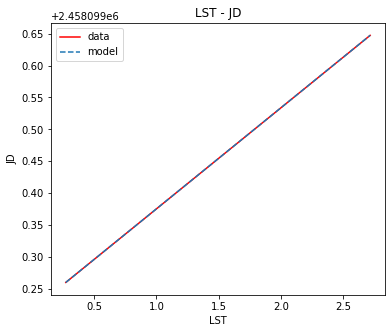

In [64]:
plt.figure(figsize=(6,5))

#modeled and data overlayed
plt.plot(lsts,modeled_jd,'r',label='data')
plt.plot(lsts,jds,'--',label='model')

#Plotting Parameters
plt.title('LST - JD')
plt.legend()
plt.xlabel('LST')
plt.ylabel('JD')
plt.legend()

It seems that it can not interpolate any jds from lsts supplied from outside the shown lst range (x-axis)

In [121]:
def interpolate(LST_array,jd_array,LST=None):
    """This function will take a given LST_array and 
    jd_array and fit it...
    
    Arguments: 
    LST_array: LST_array in numpy array
    jd_array: JD array in numpy array
    LST = LST to interpolate jd for, Default is None
    
    Returns:
    JD array:Blah
    
    
    
    """
    m,b = LinearFit(LST_array,jds)[0][:]
    
    modeled_jd = m * LST_array + b
    
    if LST == None:
        return modeled_jd
    else:
        #interpolate the value
        jd_at_lst = np.interp(LST, lsts, modeled_jd)
    
    return jd_at_lst

# Tl:dr

* Use James's LinearFit function(either by importing it from somewhere else or explicitly copying the cell below to use for interpolate function
* Now Just input a LST,jd array (obtained from Adams lst slicer script) to get a modeled jd, or additionaly, input a LST to interpolate a JD

In [125]:
def LinearFit(x,y,W = None):
    
    if W is None:
        W = np.eye(len(x))
    
    # Make the matrix X
    # A constant vector, and a vector proportional to the independent variable x
    X = np.array([ [x], [np.ones_like(x)]]).squeeze().T
    Cinv = np.matmul(X.T,np.matmul(W,X))
    C = np.linalg.inv(Cinv)
    params = np.matmul(C, np.matmul(X.T,np.matmul(W,y)))
    return params, C

In [135]:
def interpolate(LST_array,jd_array,LST=None):
    """This function will take a given LST_array and 
    jd_array and fit it...
    
    Arguments: 
    LST_array: LST_array in numpy array
    jd_array: JD array in numpy array
    LST = LST to interpolate jd for, Default is None
    
    Returns:
    JD array:Blah
      
    """
    #model the data
    m,b = LinearFit(LST_array,jds)[0][:]
    modeled_jd = m * LST_array + b
    
    if LST == None:
        #plot data
        plt.figure(figsize=(6,5))

        #modeled and data overlayed
        plt.plot(lsts,modeled_jd,'r',label='data')
        plt.plot(lsts,jds,'--',label='model')

        #Plotting Parameters
        plt.title('$LST vs JD$')
        plt.legend()
        plt.xlabel('$LST$')
        plt.ylabel('$JD$')
        plt.legend()
        return modeled_jd
        
    else:
        #interpolate the value
        jd_at_lst = np.interp(LST, lsts, modeled_jd)
    
    return jd_at_lst

array([2458099.25979724, 2458099.25992152, 2458099.26004579, ...,
       2458099.6471645 , 2458099.64728878, 2458099.64741305])

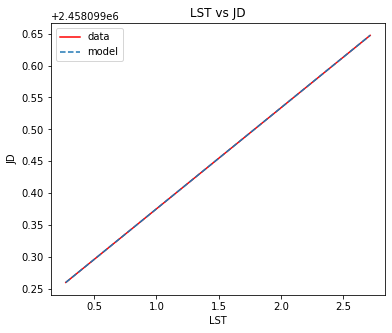

In [137]:
interpolate(lsts,jds)